In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings

warnings.filterwarnings('ignore')

In [38]:
train = pd.read_csv('internship_train.csv')
test = pd.read_csv('internship_hidden_test.csv')

In [39]:
train.head(15)

0    1    2    3    4    5         6         7  8    9  ...         44  \
0   236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1   386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   
2   429   49  481  111  111  146  8.602325  0.651162  1  430  ...  14.030257   
3   414  350  481  370  208  158  8.306624  0.424645  1  340  ...   2.789577   
4   318  359   20  218  317  301  8.124038  0.767304  1  212  ...   1.886560   
5    70  299  297  350  428  359  5.830952  0.505189  1   73  ...   1.486867   
6   457  363  162   67  388  326 -1.414214  0.604309  0  258  ...   8.260282   
7   414  271  163  317  359  116 -6.324555  0.022464  0  485  ...   5.925065   
8   420   85  378   71  243  301 -8.602325  0.228071  0  401  ...   5.483159   
9   445  304  359  298  141  369  8.774964  0.919384  1   63  ...  12.267670   
10   91  108  301  310  194  221  5.916080  0.542302  1  167  ...  10.808247   
11  222  487  143  339  307  321 -8.306624  0.729045  0  482  ...  14.883748   
12   51  299  300  330   72  331  7.416198  0.948506  1  487  ...   6.753048   
13   60  340  319  419  113  482 -5.830952  0.155858  0  298  ...   5.218378   
14  223    5   26  126  105  465  4.000000  0.271432  1  294  ...   7.214509   

           45         46         47         48         49         50  \
0    0.870542   1.962937   7.466666  11.547794   8.822916   9.046424   
1    7.168680   2.885415  12.413973  10.260494  10.091351   9.270888   
2    0.394970   8.160625  12.592059   8.937577   2.265191  11.255721   
3    6.416708  10.549814  11.456437   6.468099   2.519049   0.258284   
4    1.919999   2.268203   0.149421   4.105907  10.416291   6.816217   
5    0.366128  11.245683   6.116113   9.315978   4.063209   7.156703   
6    5.239815   1.163579  10.797268   5.819056   4.451118  14.645322   
7    6.080010  11.318467  11.013787  12.137311   2.759765  10.537518   
8    1.534398   4.690240  11.142059  12.290323   1.975012  11.061706   
9    4.999463   0.376892   0.121794   0.914422  12.471633  13.760204   
10   6.294332  13.076332   7.813610  13.174244   3.403862   8.960355   
11   1.268174  11.952291   5.727112  12.704412  14.635859  11.892229   
12   3.598948   5.373912  14.895750  14.332377   7.264303   6.937517   
13   2.116420   7.739697   6.463489   7.653508   1.853527   2.958600   
14  13.066372  11.908762   3.711022   8.236129   1.877742  11.375934   

           51         52     target  
0    7.895535  11.010677  20.107472  
1    3.173994  13.921871  61.763713  
2   12.794841  12.080951  74.651162  
3    9.317696   5.383098  69.424645  
4    8.586960   4.512419  66.767304  
5   12.132241  14.141104  34.505189  
6   11.739865  14.763017   2.604309  
7    4.243830   3.232530  40.022464  
8   14.486846  13.244187  74.228071  
9   14.500278   4.583603  77.919384  
10  13.944605  13.772970  35.542302  
11  14.672657  12.163575  69.729045  
12  12.194567  11.669260  55.948506  
13  12.436950  10.276686  34.155858  
14   5.897645   5.695726  16.271432  

[15 rows x 54 columns]

In [40]:
test.head(5)

0    1    2    3    4    5         6         7  8    9  ...         43  \
0  259  388  402  340  156  382  3.316625  0.218760  1  164  ...   7.163474   
1  441  192  381  421  452  123 -8.888194  0.700228  0  349  ...  10.619064   
2   83  129  107  156  247  191  2.645751  0.494556  1  297  ...   1.819890   
3  183  438  191  116  491  403 -6.164414  0.511117  0  272  ...   4.168135   
4  449  156  310  188  279  465  8.000000  0.756416  1   90  ...   7.908122   

          44         45        46         47         48         49         50  \
0  10.227235   0.889111  9.190222   4.670908   0.931525   7.634177   0.158196   
1   9.339161   4.221861  0.595563  13.865748   0.328453  11.507599   9.107966   
2  10.670237  10.350867  5.134417   5.898995   8.374986   4.638049   3.160023   
3  12.782579   0.513072  0.321295  11.334062  11.735511   1.911520   8.365676   
4   1.140498  14.165074  7.688796   5.079241   8.152186   1.680403  13.215111   

          51         52  
0  13.432551   2.511191  
1   1.302407  11.105604  
2   2.243799   5.073030  
3   4.877288  11.601819  
4   5.823109   1.038015  

[5 rows x 53 columns]

In [41]:
train.shape

(90000, 54)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [43]:
train.isnull().sum().sum()

0

No missing data.

In [44]:
# check for unique values

for column in train:
    unique_values = np.unique(train[column])
    nr_values = len(unique_values)
    if nr_values <= 2:
        print(f"The number of values for feature {column} is: {nr_values}.\t"
              f"Data type: {type(train[column][0])}\tValues: {unique_values}")
    else:
        print(f"The number of values for feature {column} is: {nr_values},"
              f"\tData type: {type(train[column][0])},"
              f"\tMean of values: {train[column].mean()}, std: {train[column].std()}.")


The number of values for feature 0 is: 500,	Data type: <class 'numpy.int64'>,	Mean of values: 249.42394444444443, std: 144.33639328527588.
The number of values for feature 1 is: 500,	Data type: <class 'numpy.int64'>,	Mean of values: 250.23626666666667, std: 144.02219953957737.
The number of values for feature 2 is: 500,	Data type: <class 'numpy.int64'>,	Mean of values: 248.6372888888889, std: 144.10757681723447.
The number of values for feature 3 is: 500,	Data type: <class 'numpy.int64'>,	Mean of values: 249.7366, std: 144.28494516003067.
The number of values for feature 4 is: 500,	Data type: <class 'numpy.int64'>,	Mean of values: 249.43617777777777, std: 143.94158099666956.
The number of values for feature 5 is: 500,	Data type: <class 'numpy.int64'>,	Mean of values: 249.65616666666668, std: 144.32916822267137.
The number of values for feature 6 is: 199,	Data type: <class 'numpy.float64'>,	Mean of values: -0.011401635673851454, std: 7.038171192462654.
The number of values for feature 7

In [45]:
def hist(data, arg):
    sns.histplot(data=data[arg], kde=True)
    plt.show()


def box(data, arg):
    sns.boxplot(data=data[arg])
    plt.show()


def corr(data, arg, target):
    sns.scatterplot(x=data[arg], y=data[target])
    plt.show()



 1


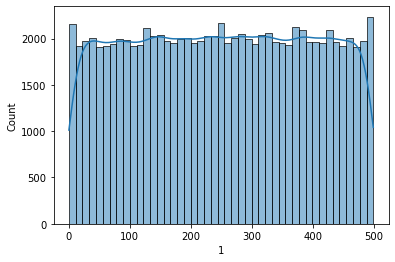

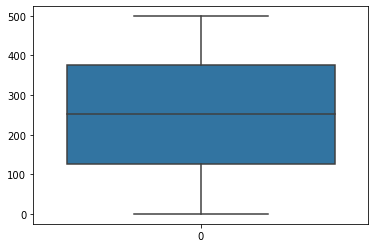

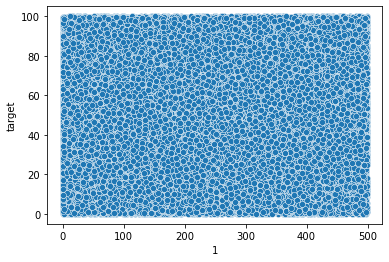



 2


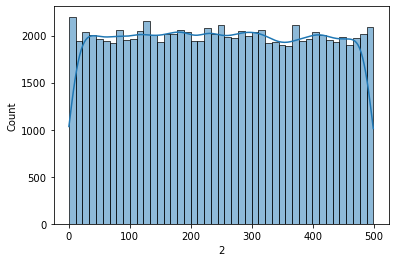

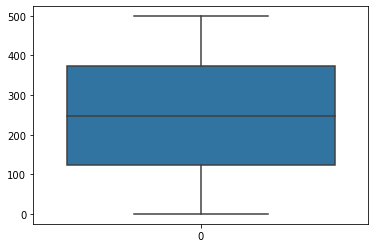

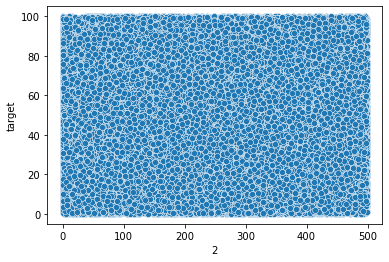



 3


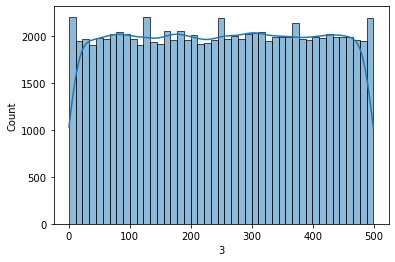

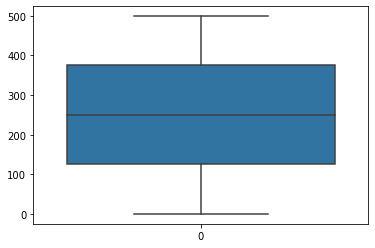

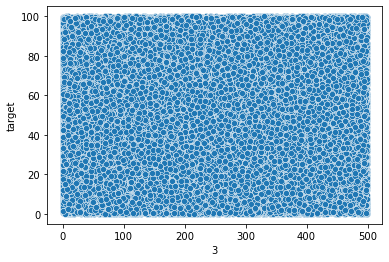



 4


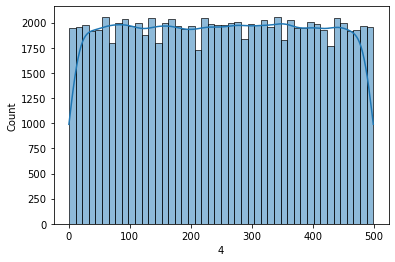

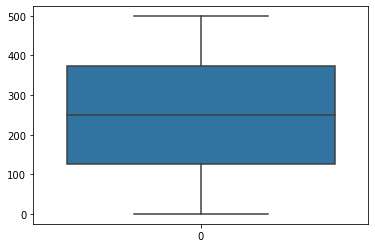

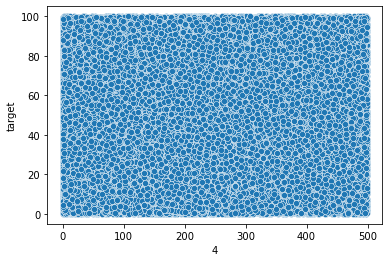



 5


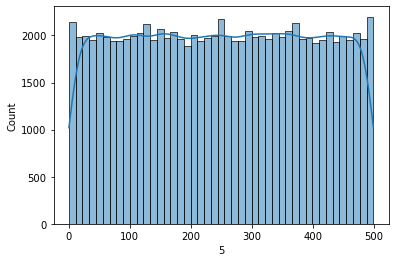

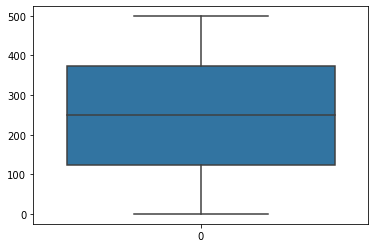

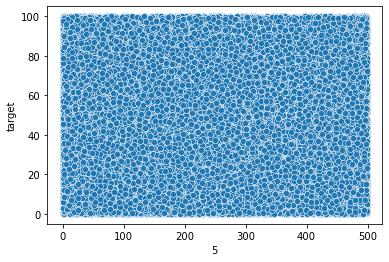



 6


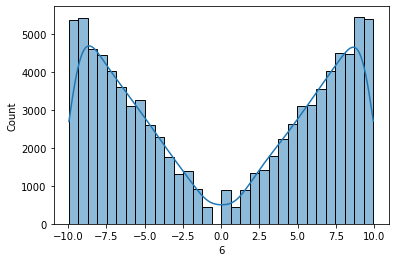

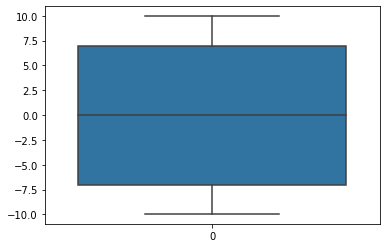

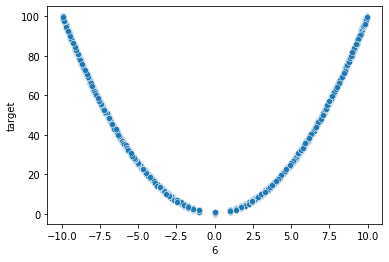



 7


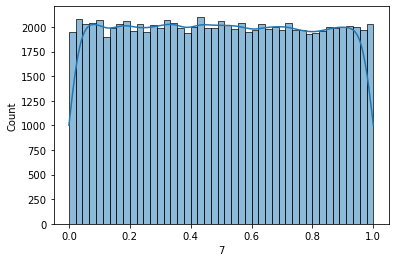

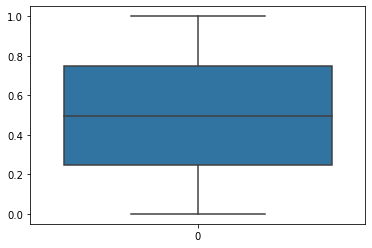

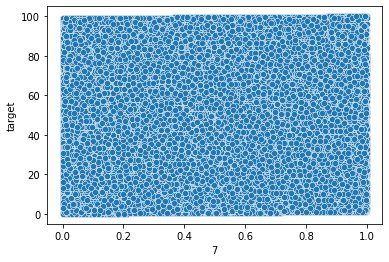



 8


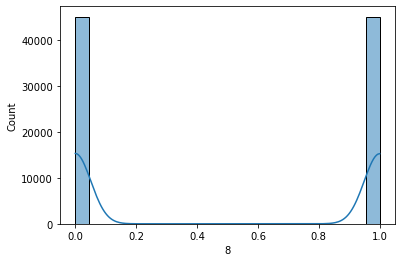

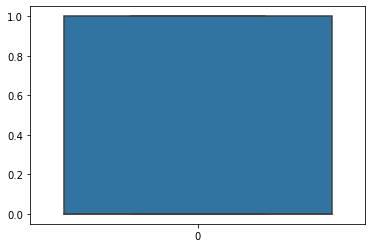

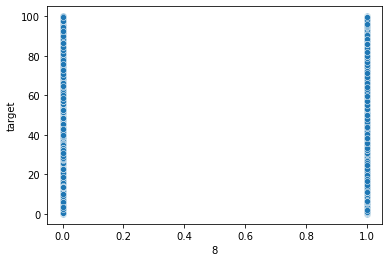



 9


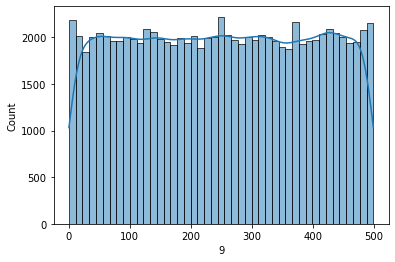

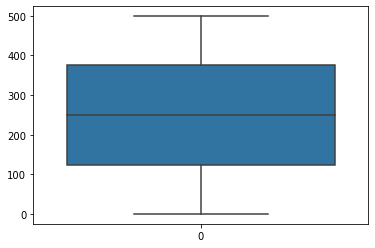

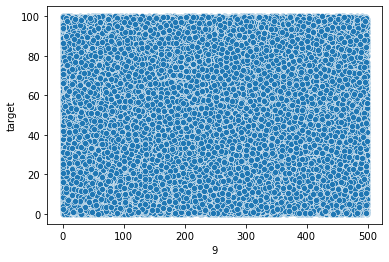



 10


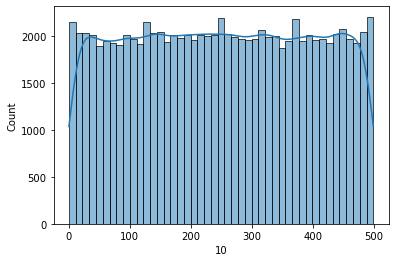

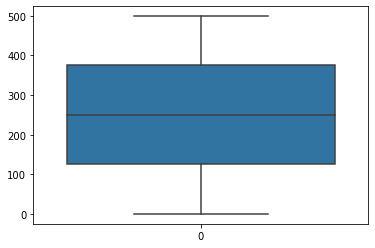

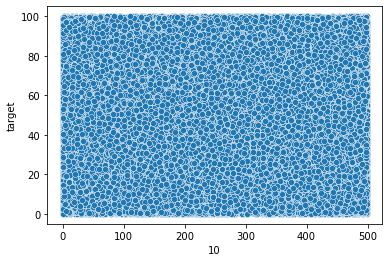



 11


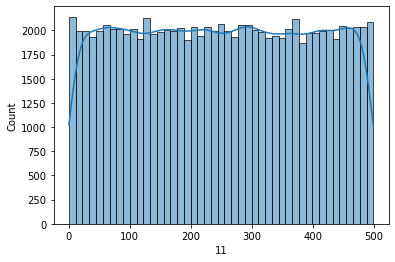

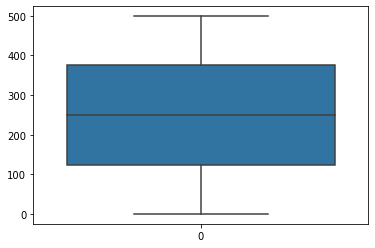

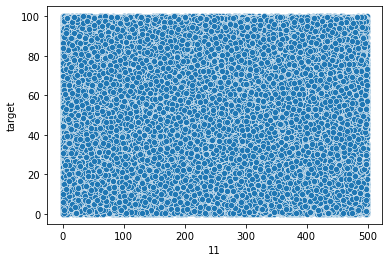



 12


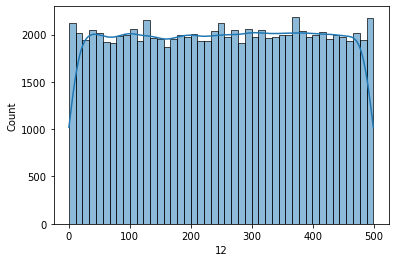

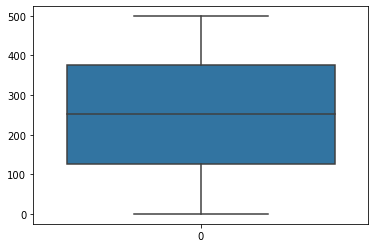

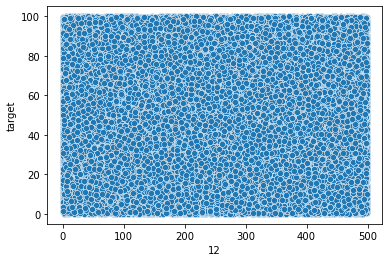



 13


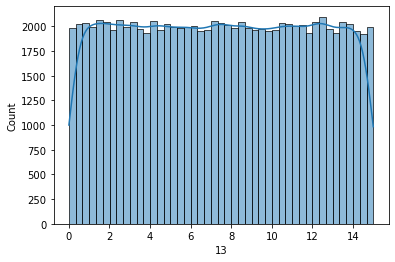

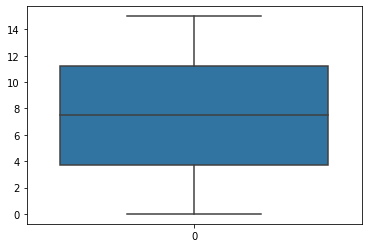

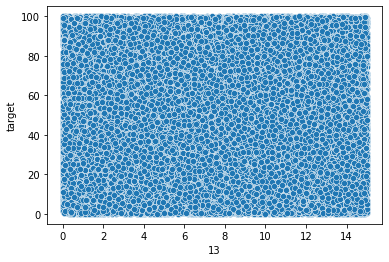



 14


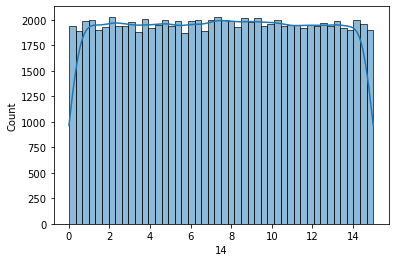

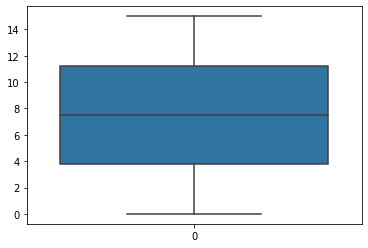

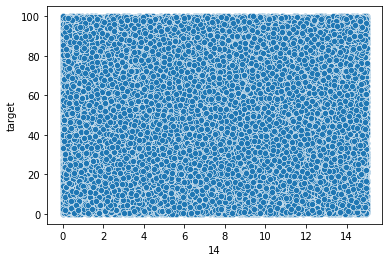



 15


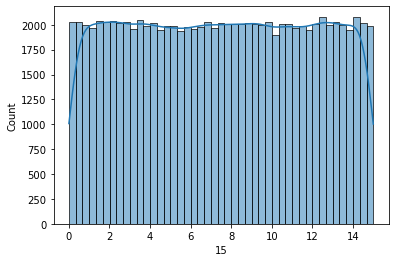

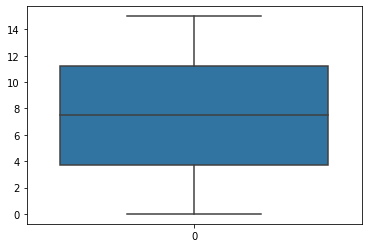

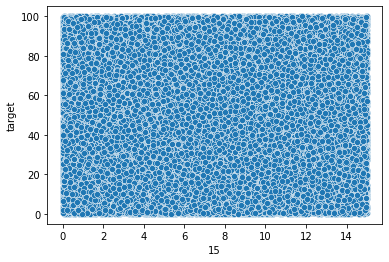



 16


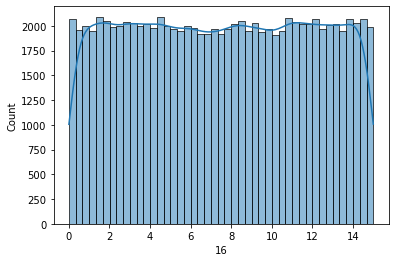

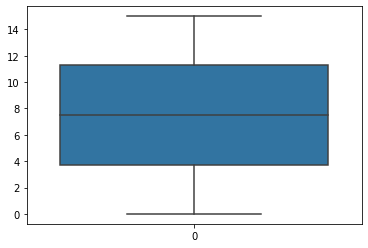

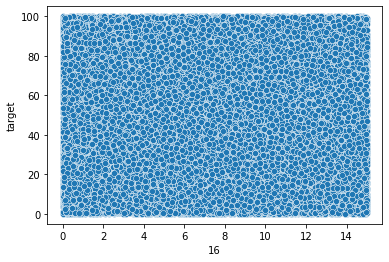



 17


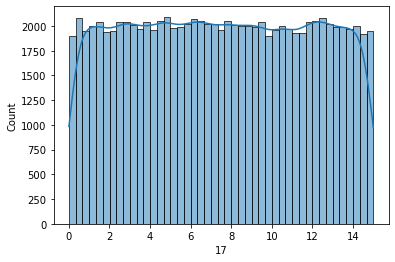

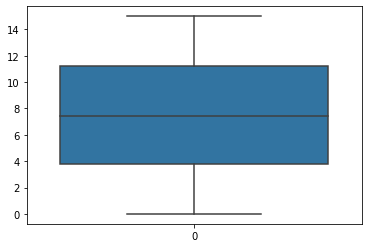

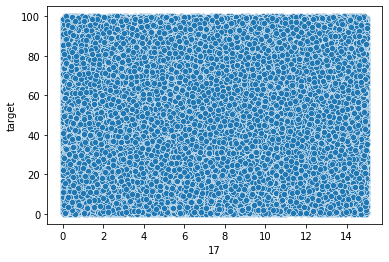



 18


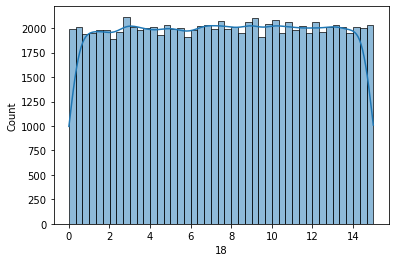

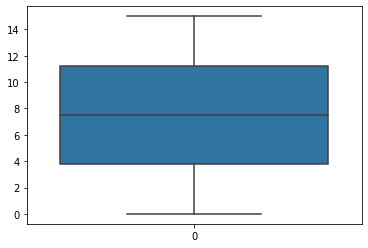

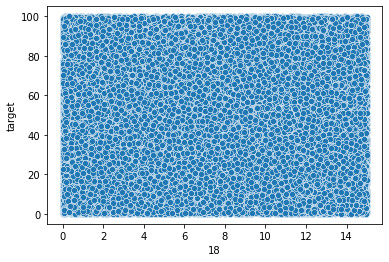



 19


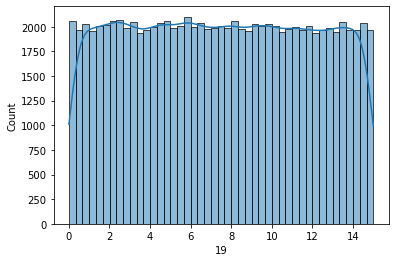

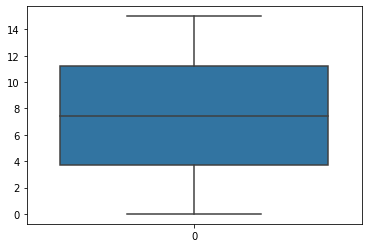

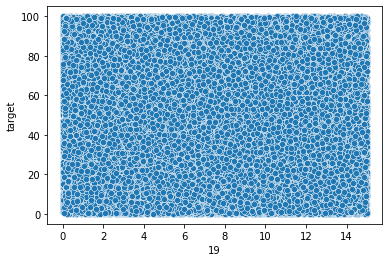



 20


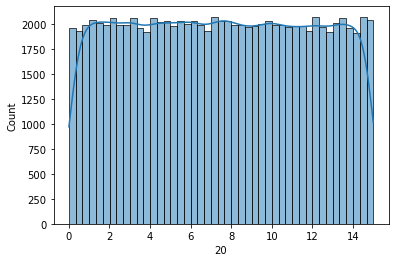

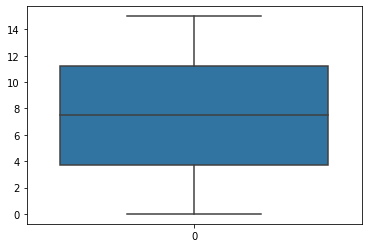

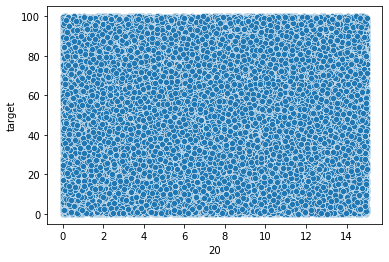



 21


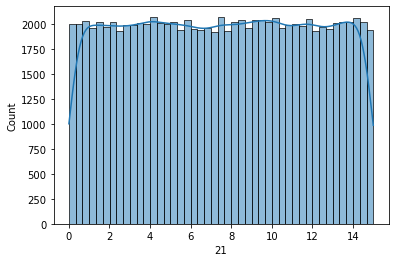

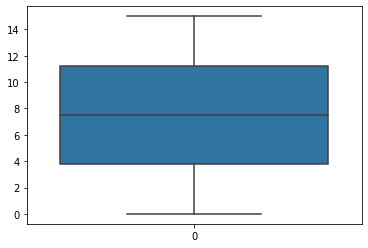

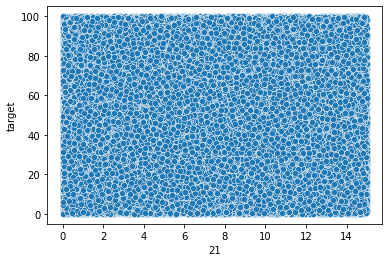



 22


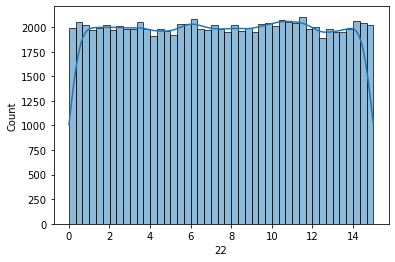

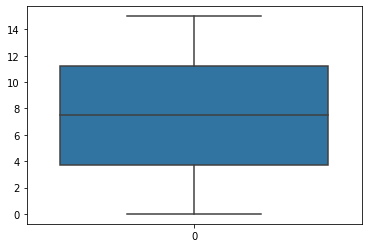

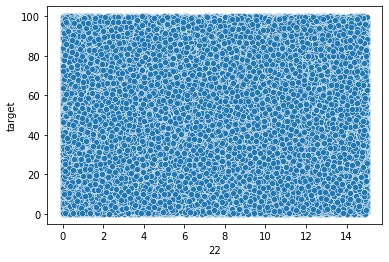



 23


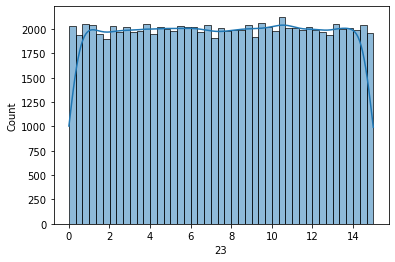

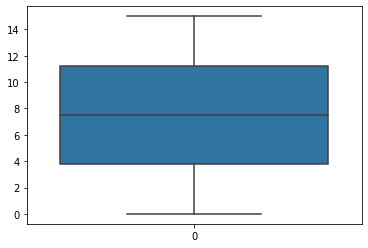

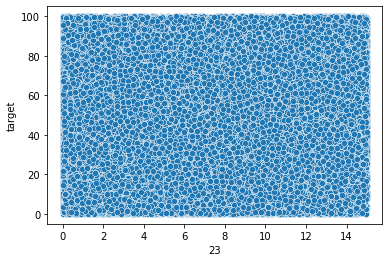



 24


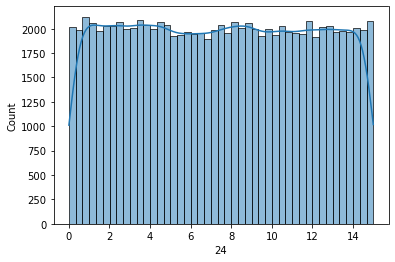

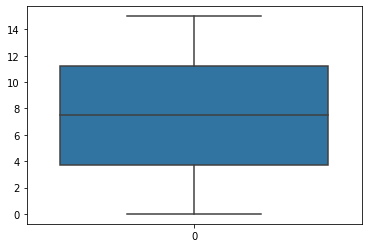

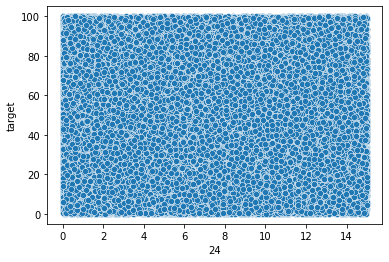



 25


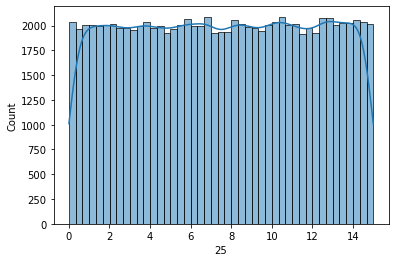

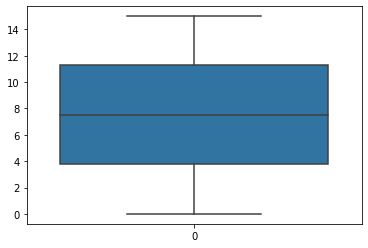

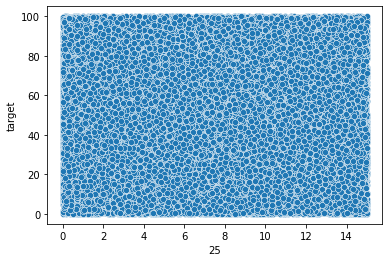



 26


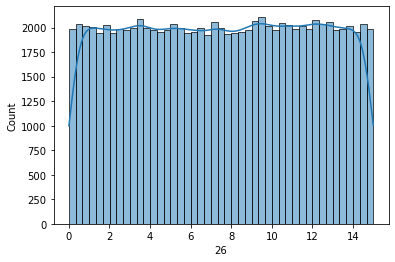

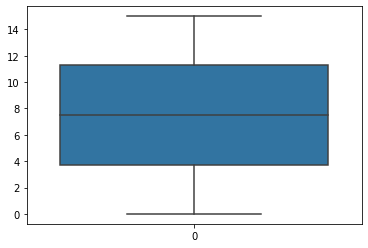

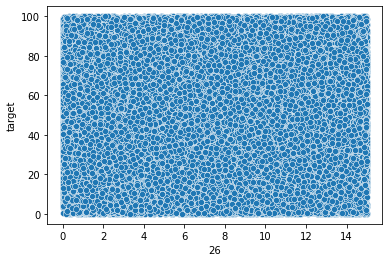



 27


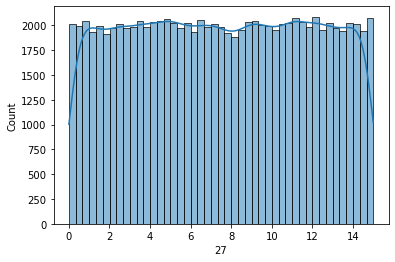

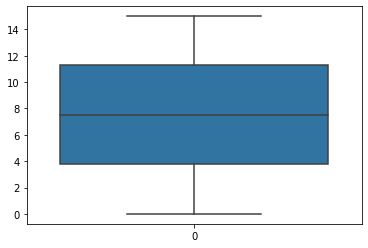

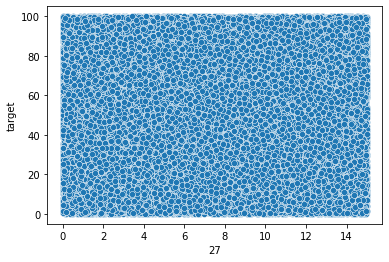



 28


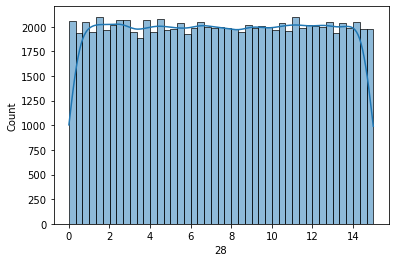

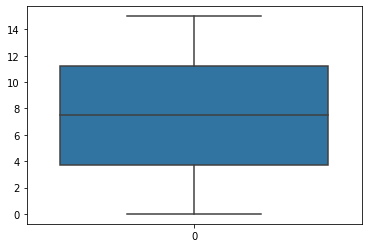

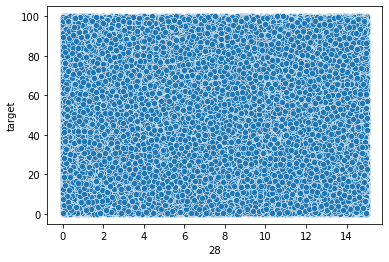



 29


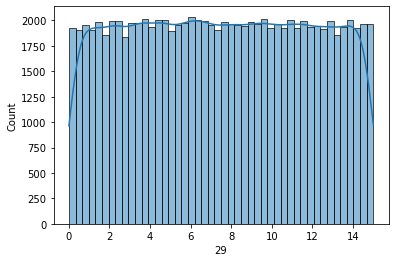

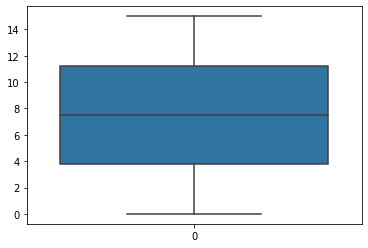

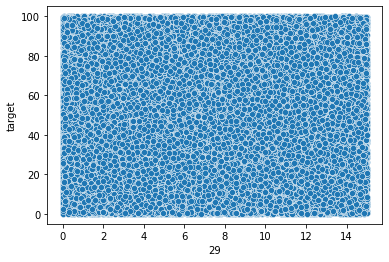



 30


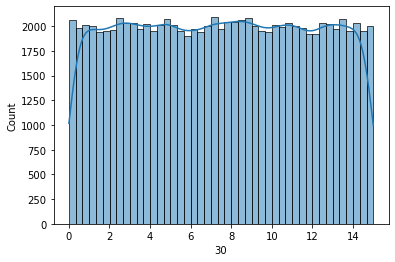

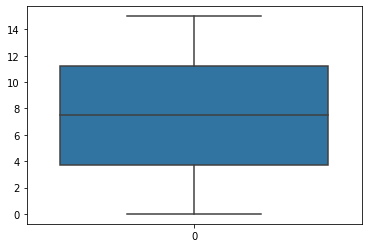

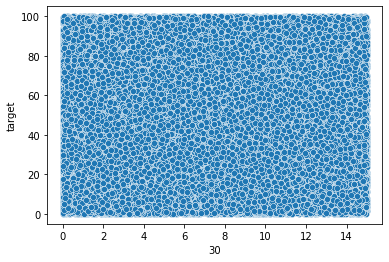



 31


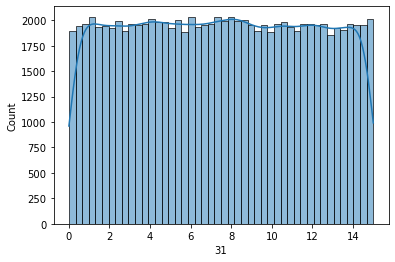

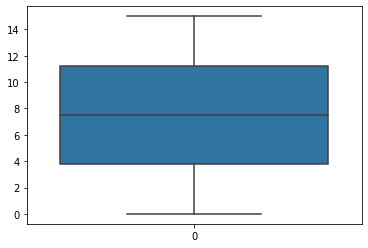

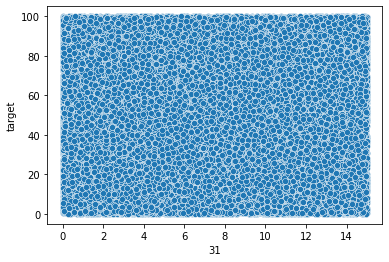



 32


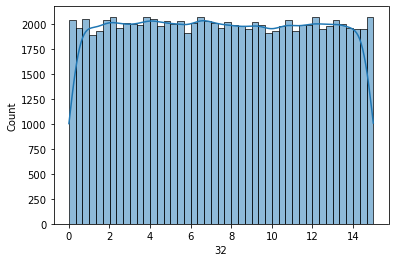

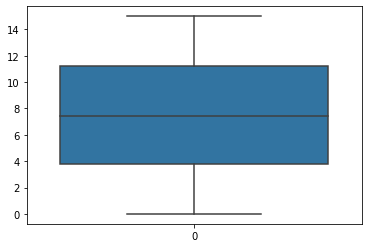

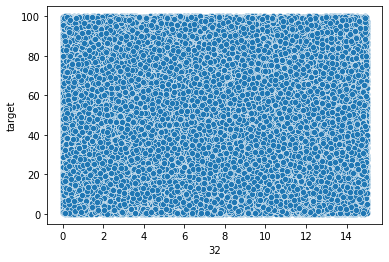



 33


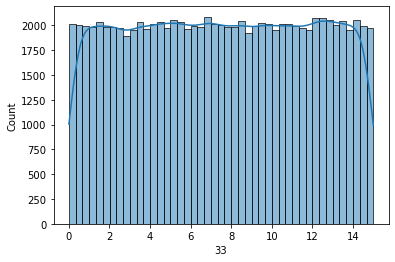

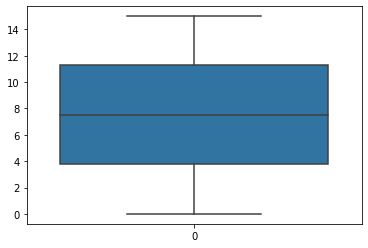

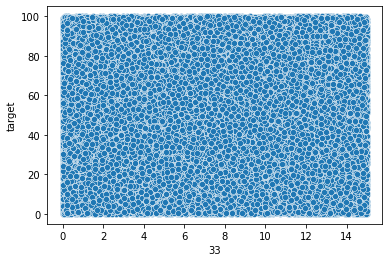



 34


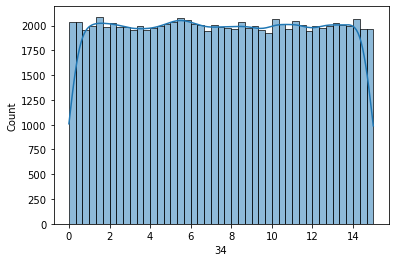

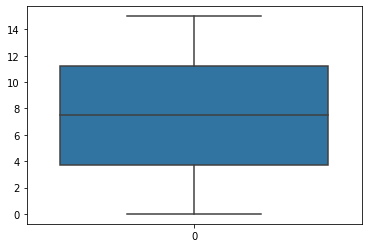

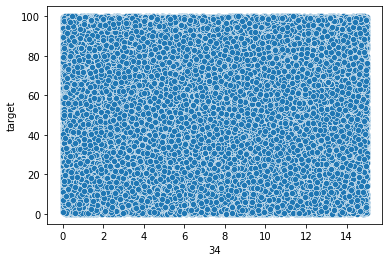



 35


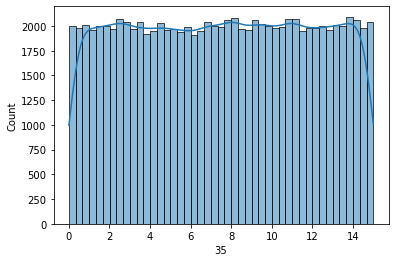

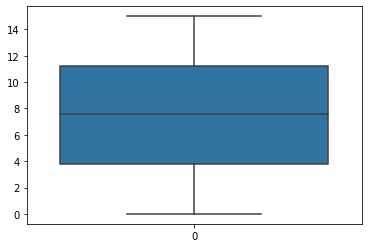

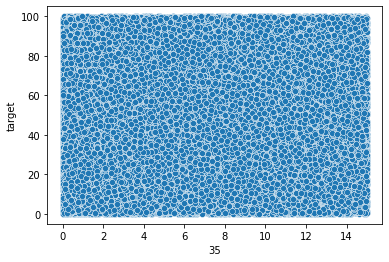



 36


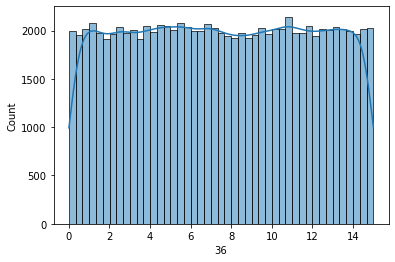

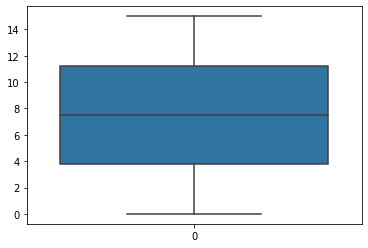

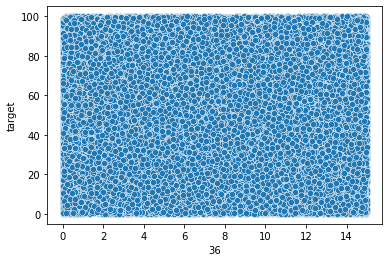



 37


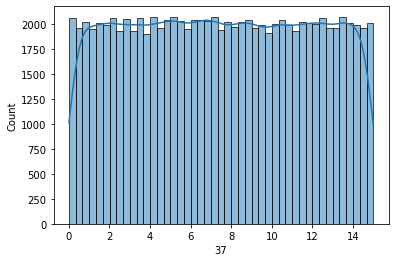

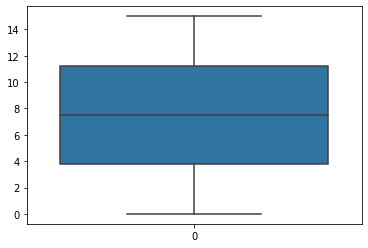

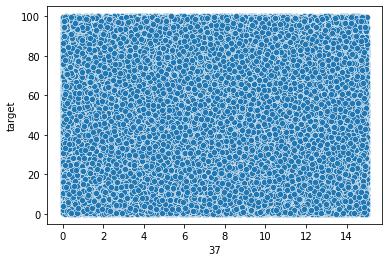



 38


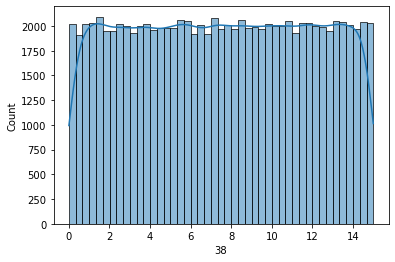

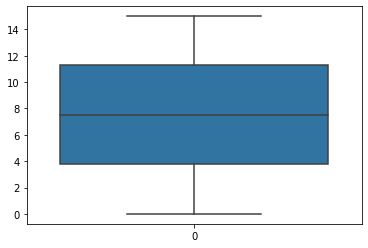

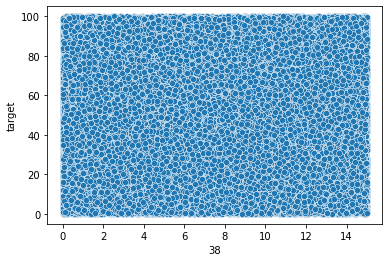



 39


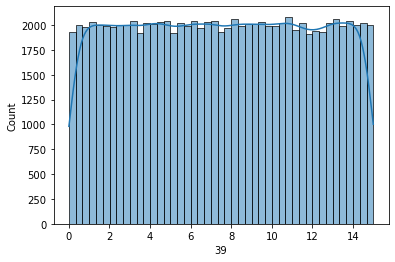

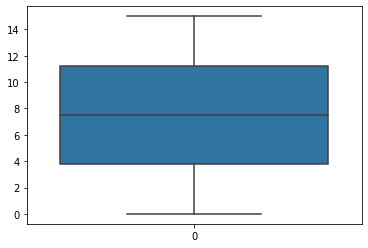

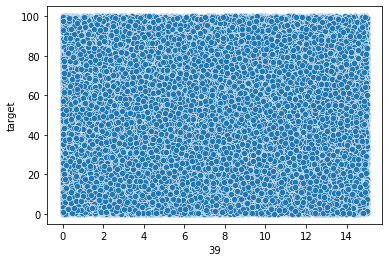



 40


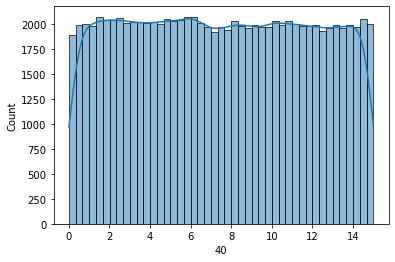

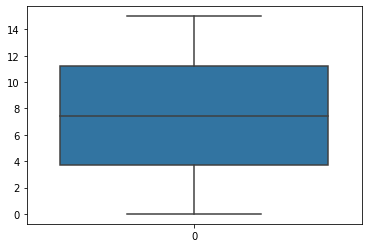

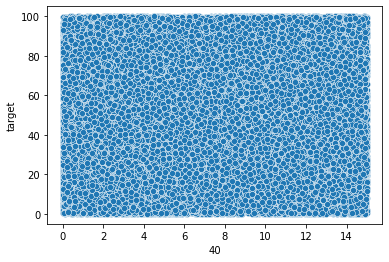



 41


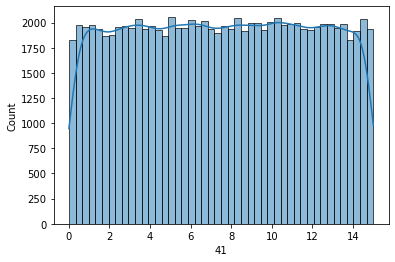

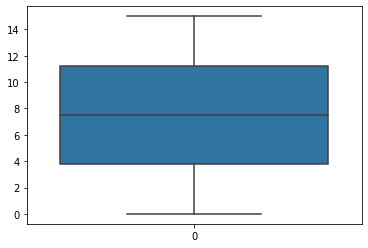

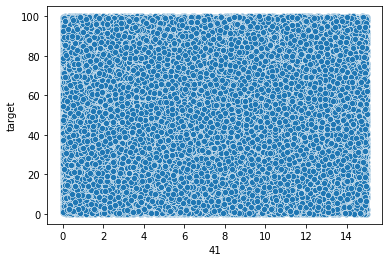



 42


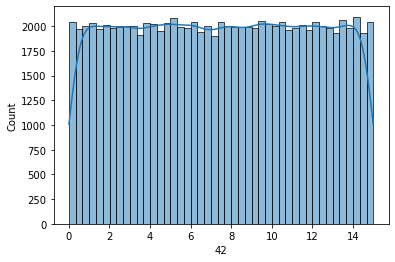

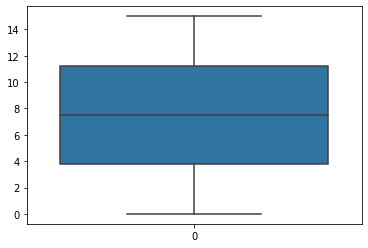

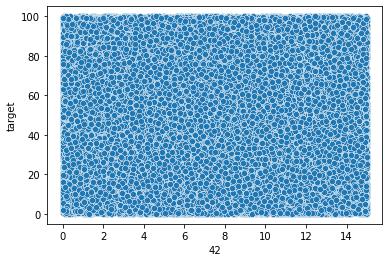



 43


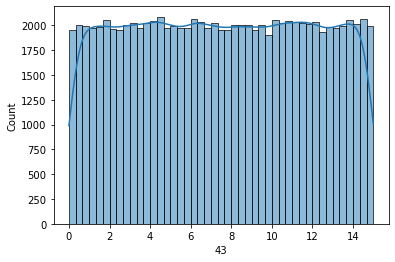

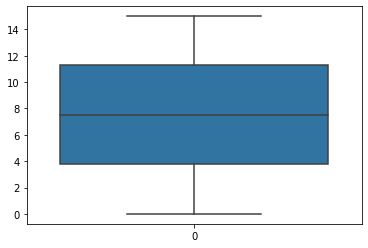

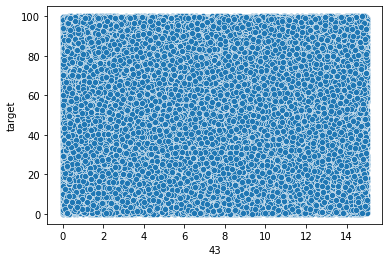



 44


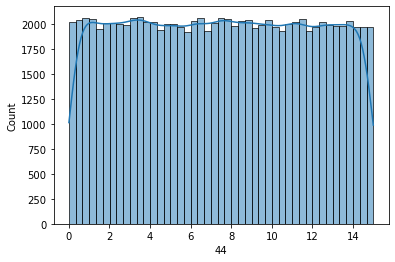

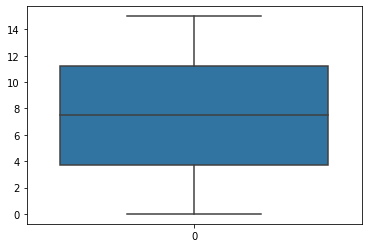

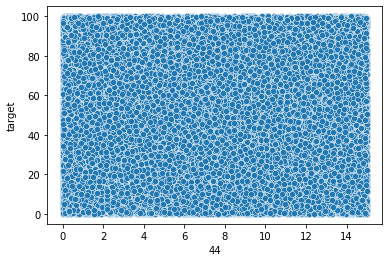



 45


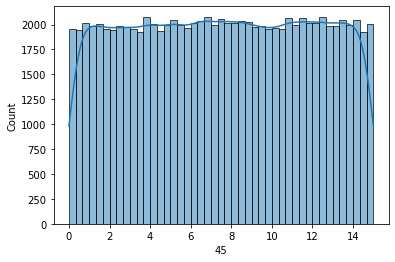

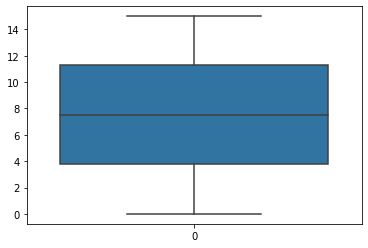

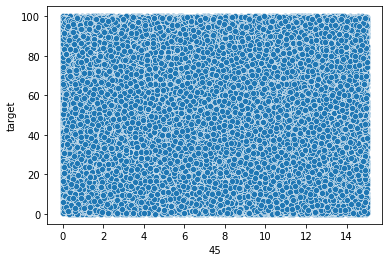



 46


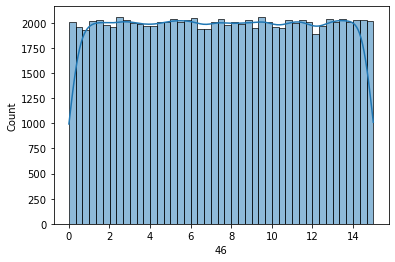

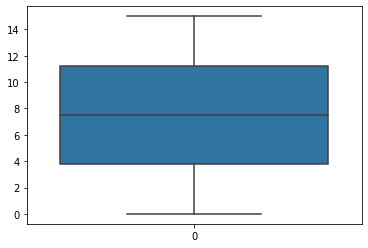

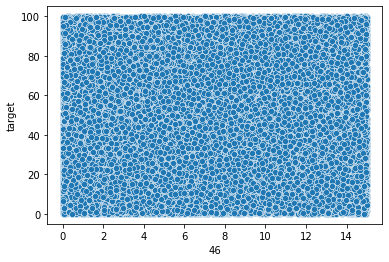



 47


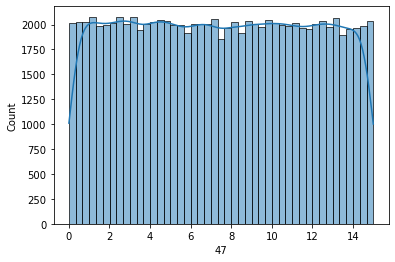

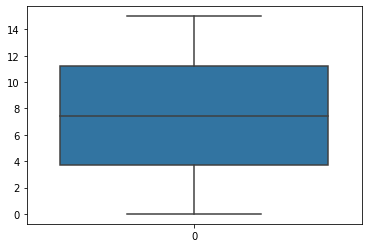

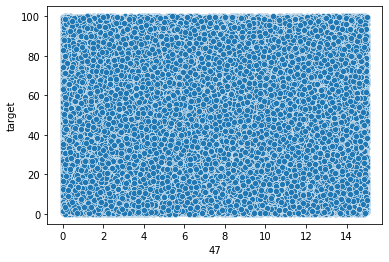



 48


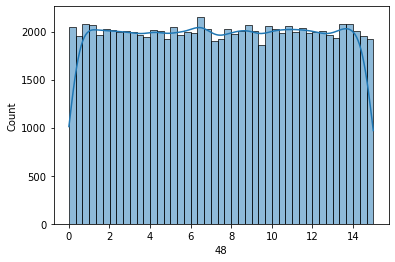

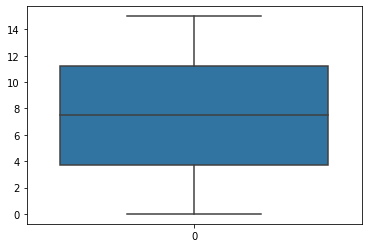

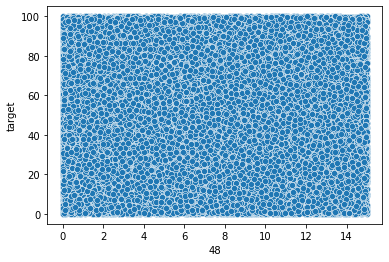



 49


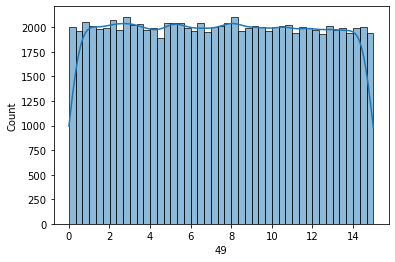

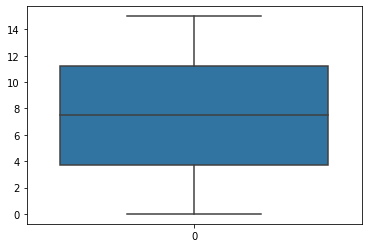

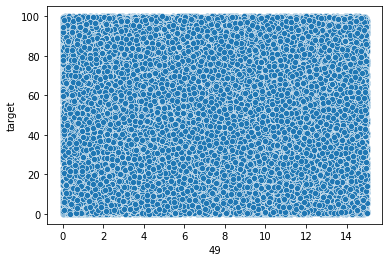



 50


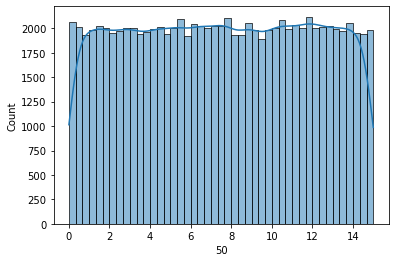

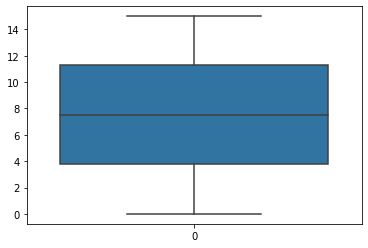

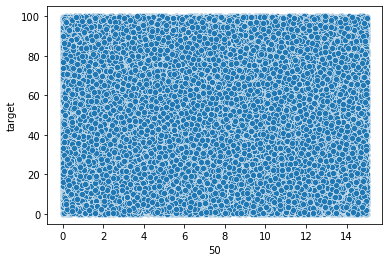



 51


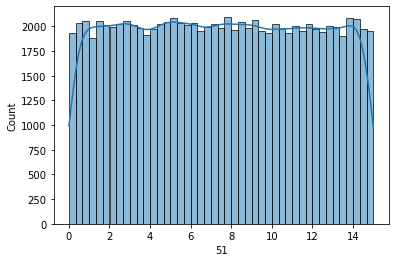

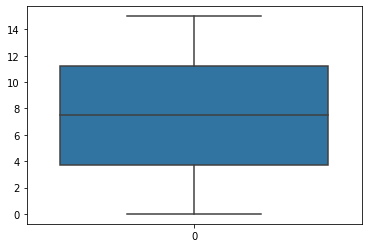

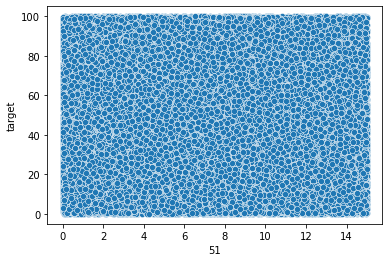



 52


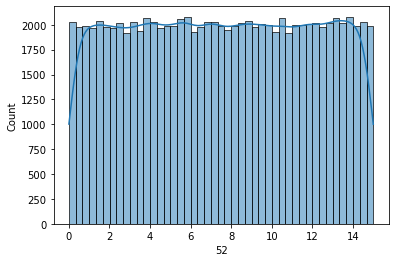

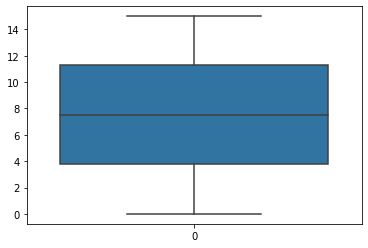

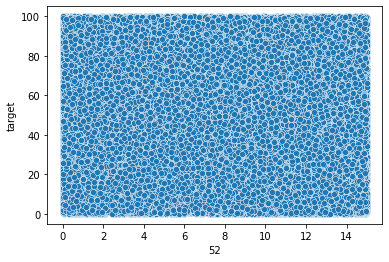

In [46]:

for i in range(1, 53):
    print("\n\n", i)
    hist(train, str(i))
    box(train, str(i))
    corr(train, str(i), 'target')

At first glance there are 5 types of input data:
- int64: from 0 to 500 - uniform distribution, mean≈250 and std≈145 (features 0, 1, 2, 3, 4, 5, 9, 10, 11, 12)
- float64: from -10 to 10 - exp distribution - evenly spaced out 200 float numbers:  (feature nr 6)
- float64: from 0 to 1 - uniform distribution,  mean≈0.5 and std≈0.28:  (feature nr 7)
- int64: 0 or 1 - bernoulli distribution - binary data (feature nr 8)
- float64: from 0 to 15 - uniform distribution, unique numbers, mean≈7 and std≈4.3 (rest of input features)

Moreover, no outliners.

<AxesSubplot:>

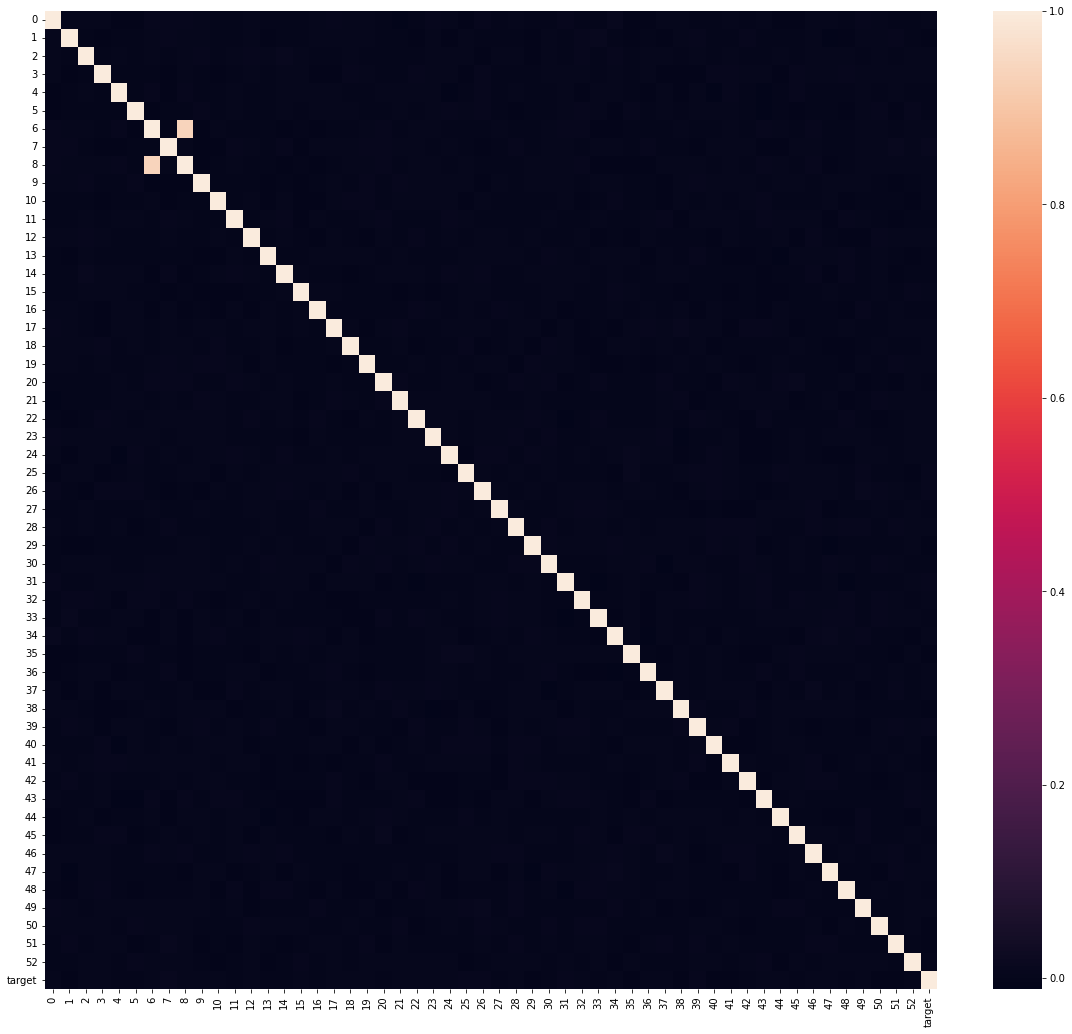

In [47]:
plt.figure(figsize=(20, 18))
sns.heatmap(train.corr())

In [48]:
feature_6 = train['6'].values
feature_8 = train['8'].values

feature_6_0 = [val for i, val in enumerate(feature_6) if feature_8[i] == 0]
feature_6_1 = [val for i, val in enumerate(feature_6) if feature_8[i] == 1]

print(f"Feature 6 array when feature 8==0: min={np.min(feature_6_0)}, "
      f"max={np.max(feature_6_0)}, mean={np.mean(feature_6_0)}, std={np.std(feature_6_0)}.")
print(f"Feature 6 array when feature 8==1: min={np.min(feature_6_1)}, "
      f"max={np.max(feature_6_1)}, mean={np.mean(feature_6_1)}, std={np.std(feature_6_1)}.")

Feature 6 array when feature 8==0: min=-9.9498743710662, max=-0.0, mean=-6.616632085352473, std=2.397047814186397.
Feature 6 array when feature 8==1: min=0.0, max=9.9498743710662, mean=6.615293938443371, std=2.4048131245661013.


Seems like artificially generated random data, apart from correlation between feature 6 and 8: 

> feature 6 is positive when feature 8 equals 1 and is negative when feature 8 equals 0.





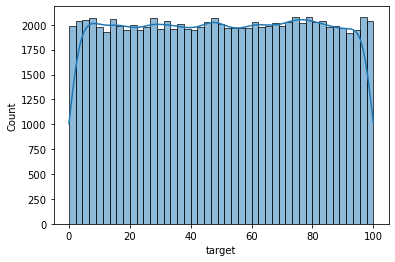

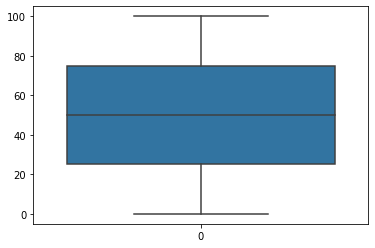

In [49]:
hist(train, 'target')
box(train, 'target')

Target values

In [50]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression, ElasticNetCV
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold

In [51]:
# split into inputs and outputs
train_X, train_y = train.values[:, :-1], train.values[:, -1]
print(train_X.shape, train_y.shape)

(90000, 53) (90000,)


In [52]:
model = LinearRegression()
model.fit(train_X, train_y)
predictions_lr = model.predict(train_X)
print(
    f"Min val: {predictions_lr.min()}, max val: {predictions_lr.max()}, mean: {predictions_lr.mean()}, std: {predictions_lr.std()}")

scores = cross_val_score(model, train_X, train_y, cv=9, scoring='neg_root_mean_squared_error')

print(f"Mean score of {-scores.mean():.3f} with a standard deviation of {scores.std():.3f}")

Min val: 47.214642207400104, max val: 52.852377414901795, mean: 50.033980982074326, std: 0.7260074184815883
Mean score of 28.905 with a standard deviation of 0.136


At first glance it looks like target values has no correlation with the input features and model is predicting values around mean (50).


In [53]:
from sklearn.utils import shuffle

transformers = [QuantileTransformer(), MinMaxScaler(), StandardScaler(), RobustScaler()]
models = [Lasso(), LinearRegression()]
for t in transformers:
    for m in models:
        pipeline = Pipeline(steps=[('t', t), ('m', m)])

        cv = KFold(n_splits=5, random_state=1, shuffle=True)
        scores = cross_val_score(pipeline, train_X, train_y,
                                 scoring='neg_root_mean_squared_error',
                                 cv=cv, n_jobs=-1, error_score='raise')

        s_mean = -np.mean(scores)
        print(f"Mean RMSE: {s_mean:.3f} \tfor transformer {type(t)} \tand model {type(m)}.")

Mean RMSE: 28.897 	for transformer <class 'sklearn.preprocessing._data.QuantileTransformer'> 	and model <class 'sklearn.linear_model._coordinate_descent.Lasso'>.
Mean RMSE: 28.912 	for transformer <class 'sklearn.preprocessing._data.QuantileTransformer'> 	and model <class 'sklearn.linear_model._base.LinearRegression'>.
Mean RMSE: 28.897 	for transformer <class 'sklearn.preprocessing._data.MinMaxScaler'> 	and model <class 'sklearn.linear_model._coordinate_descent.Lasso'>.
Mean RMSE: 28.912 	for transformer <class 'sklearn.preprocessing._data.MinMaxScaler'> 	and model <class 'sklearn.linear_model._base.LinearRegression'>.
Mean RMSE: 28.897 	for transformer <class 'sklearn.preprocessing._data.StandardScaler'> 	and model <class 'sklearn.linear_model._coordinate_descent.Lasso'>.
Mean RMSE: 28.912 	for transformer <class 'sklearn.preprocessing._data.StandardScaler'> 	and model <class 'sklearn.linear_model._base.LinearRegression'>.
Mean RMSE: 28.897 	for transformer <class 'sklearn.preprocess

Every model with every feature scaling scores the same RMSE - similar to what was achived with LinearRegression.

In [54]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(train_X, train_y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

predictions_enet = model.predict(train_X)
print(
    f"Min val: {predictions_enet.min()}, max val: {predictions_enet.max()}, mean: {predictions_enet.mean()}, std: {predictions_enet.std()}")

alpha: 100.000000
l1_ratio_: 0.310000
Min val: 50.03398098207432, max val: 50.03398098207432, mean: 50.033980982074326, std: 7.105427357601002e-15


The best ElasticNet model found predicts 50.033 for every input.